In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image

In [8]:
# uploaded in dropbox and using it
!wget https://www.dropbox.com/s/xmopr2altgp8f0a/dataset.zip?dl=0 -O dataset.zip

--2020-06-30 14:12:34--  https://www.dropbox.com/s/xmopr2altgp8f0a/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xmopr2altgp8f0a/dataset.zip [following]
--2020-06-30 14:12:34--  https://www.dropbox.com/s/raw/xmopr2altgp8f0a/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc64c14c0a2f9dbbdbfb2361520f.dl.dropboxusercontent.com/cd/0/inline/A6pL3ZKXqbNtUUrz2F9UYlQ1jrug1mLYJ2SGXmemP3a2VjBG4an9y8LeQH7NnfENajaek_cm7SVS1THWinTMf0P8PE6l6VyZOPXMbfpMwZ_mpJz4yj-ULIV2qw9BU6x7JlY/file# [following]
--2020-06-30 14:12:34--  https://uc64c14c0a2f9dbbdbfb2361520f.dl.dropboxusercontent.com/cd/0/inline/A6pL3ZKXqbNtUUrz2F9UYlQ1jrug1mLYJ2SGXmemP3a2VjBG4an9y8LeQH7NnfENajaek_cm7SVS1THWinTMf0P8PE6l6VyZOPXMbfpMwZ_mp

In [9]:
!unzip dataset

Archive:  dataset.zip
   creating: Test/images/
  inflating: Test/images/test_0.jpg  
  inflating: Test/images/test_1.jpg  
  inflating: Test/images/test_10.jpg  
  inflating: Test/images/test_100.jpg  
  inflating: Test/images/test_101.jpg  
  inflating: Test/images/test_102.jpg  
  inflating: Test/images/test_103.jpg  
  inflating: Test/images/test_104.jpg  
  inflating: Test/images/test_105.jpg  
  inflating: Test/images/test_106.jpg  
  inflating: Test/images/test_107.jpg  
  inflating: Test/images/test_108.jpg  
  inflating: Test/images/test_109.jpg  
  inflating: Test/images/test_11.jpg  
  inflating: Test/images/test_110.jpg  
  inflating: Test/images/test_111.jpg  
  inflating: Test/images/test_112.jpg  
  inflating: Test/images/test_113.jpg  
  inflating: Test/images/test_114.jpg  
  inflating: Test/images/test_115.jpg  
  inflating: Test/images/test_116.jpg  
  inflating: Test/images/test_117.jpg  
  inflating: Test/images/test_118.jpg  
  inflating: Test/images/test_119.jpg 

In [10]:
import os,shutil

In [11]:
folders=os.listdir("Train")
print((folders))

['Charmander', 'Meowth', 'Spearow', 'Psyduck', 'Squirtle', 'Fearow', 'Dratini', 'Bulbasaur', 'Pikachu', 'Aerodactyl']


In [12]:
# this is to make Val folder in directory
if not os.path.isdir("Val"):
  os.mkdir("Val")
!ls

dataset.zip  drive  sample_data  Test  Train  Val


In [13]:
# this to make sub folder in Val folder
for c in folders:
  p=os.path.join("Val",c)
  if not os.path.isdir(p):
    os.mkdir(p)

In [14]:
print("for training data:- ")
for f in folders:
  path="Train/"+f
  print(f+ " "+ str(len(os.listdir(path))))

for training data:- 
Charmander 264
Meowth 63
Spearow 117
Psyduck 143
Squirtle 248
Fearow 111
Dratini 98
Bulbasaur 255
Pikachu 268
Aerodactyl 80


In [15]:
# this is to move 10% image from train to val folder
# this is to run once if storage contain images in val then do not run this again as it will decrease the data from train data
Split=0.9

for f in os.listdir("Train"):
  path = "Train/"+f
  # this can also be used  path=os.path.join("Train",f)
  imgs=os.listdir(path)
  split_size= int(Split*len(imgs))
  file_to_move=imgs[split_size:]
  #print(len(file_to_move))
  #print(file_to_move)

  for img_f in file_to_move:
    src=os.path.join(path,img_f)
    dest=os.path.join("Val/"+f,img_f)
    #print(src)
    #print(dest)
    shutil.move(src,dest)

In [16]:
print("for training data:- ")
for f in folders:
  path="Train/"+f
  print(f+ " "+ str(len(os.listdir(path))))
print("")
print("for vaidation data:- ")
for f in folders:
  path="Val/"+f
  print(f+ " "+ str(len(os.listdir(path))))

for training data:- 
Charmander 237
Meowth 56
Spearow 105
Psyduck 128
Squirtle 223
Fearow 99
Dratini 88
Bulbasaur 229
Pikachu 241
Aerodactyl 72

for vaidation data:- 
Charmander 27
Meowth 7
Spearow 12
Psyduck 15
Squirtle 25
Fearow 12
Dratini 10
Bulbasaur 26
Pikachu 27
Aerodactyl 8


(862, 817, 3)


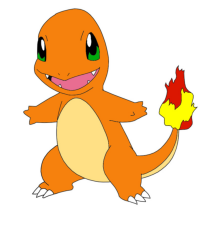

In [17]:
sample_path="Train/Charmander/00000002.jpg"
img=image.load_img(sample_path)
x=image.img_to_array(img)/255.0
print(x.shape)
plt.imshow(img)
plt.axis("off")
plt.show()

(4356, 5000, 3)


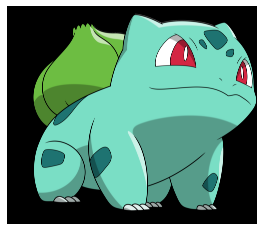

In [18]:
sample_path="Train/Bulbasaur/00000013.png"
img=image.load_img(sample_path)
x=image.img_to_array(img)/255.0
print(x.shape)
plt.imshow(img)
plt.axis("off")
plt.show()

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1.0/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             )
val_gen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_gen.flow_from_directory(
    "Train/",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_gen.flow_from_directory(
    "Val/",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 1473 images belonging to 10 classes.
Found 169 images belonging to 10 classes.


In [20]:
for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(32, 224, 224, 3)
(32, 10)


In [21]:
train_generator.class_indices

{'Aerodactyl': 0,
 'Bulbasaur': 1,
 'Charmander': 2,
 'Dratini': 3,
 'Fearow': 4,
 'Meowth': 5,
 'Pikachu': 6,
 'Psyduck': 7,
 'Spearow': 8,
 'Squirtle': 9}

In [22]:
val_generator.class_indices

{'Aerodactyl': 0,
 'Bulbasaur': 1,
 'Charmander': 2,
 'Dratini': 3,
 'Fearow': 4,
 'Meowth': 5,
 'Pikachu': 6,
 'Psyduck': 7,
 'Spearow': 8,
 'Squirtle': 9}

# building our model from scratch

In [59]:
model = models.Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [60]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 128)      

In [61]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 128)      

In [63]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=47,
    epochs=20,
    validation_data=val_generator,
    validation_steps=6
)

Epoch 1/20
 3/47 [>.............................] - ETA: 1:06 - loss: 2.8068 - accuracy: 0.0833

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/47 [==============================] - 42s 901ms/step - loss: 1.6021 - accuracy: 0.4895 - val_loss: 2.1413 - val_accuracy: 0.4024
Epoch 2/20
47/47 [==============================] - 41s 866ms/step - loss: 1.1756 - accuracy: 0.6280 - val_loss: 1.9840 - val_accuracy: 0.4320
Epoch 3/20
47/47 [==============================] - 40s 850ms/step - loss: 0.8664 - accuracy: 0.7325 - val_loss: 1.8790 - val_accuracy: 0.3728
Epoch 4/20
47/47 [==============================] - 42s 892ms/step - loss: 0.7489 - accuracy: 0.7671 - val_loss: 1.8558 - val_accuracy: 0.5858
Epoch 5/20
47/47 [==============================] - 41s 883ms/step - loss: 0.6202 - accuracy: 0.8004 - val_loss: 1.6398 - val_accuracy: 0.6154
Epoch 6/20
47/47 [==============================] - 40s 844ms/step - loss: 0.6050 - accuracy: 0.7997 - val_loss: 1.3786 - val_accuracy: 0.5444
Epoch 7/20
47/47 [==============================] - 39s 839ms/step - loss: 0.4470 - accuracy: 0.8554 - val_loss: 1.7248 - val_accuracy: 0.5621
Epoch 8/20

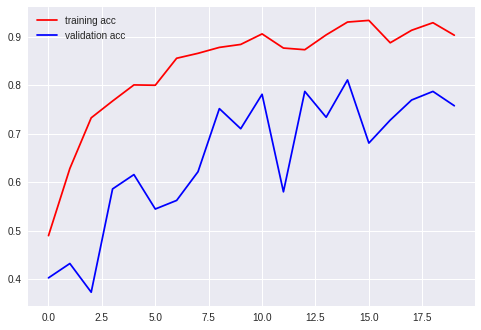

In [64]:
plt.style.use("seaborn")

plt.plot(hist.history['accuracy'],label="training acc",c='red')
plt.plot(hist.history['val_accuracy'],label="validation acc",c='blue')
plt.legend()
plt.show()

# loading test data accouding to the submission file

In [65]:
path="Test/"
y_df=pd.read_csv(path+"sample_submission.csv")
y_df.shape

(187, 2)

In [66]:
y_df.head(7)

,Name,Class
0,test_32.jpg,0
1,test_147.jpg,0
2,test_171.jpg,0
3,test_114.jpg,0
4,test_162.jpg,0
5,test_68.jpg,0
6,test_117.jpg,0


In [67]:
y_df.drop(['Class'],inplace=True,axis=1)

In [68]:
y_df.head(7)

,Name
0,test_32.jpg
1,test_147.jpg
2,test_171.jpg
3,test_114.jpg
4,test_162.jpg
5,test_68.jpg
6,test_117.jpg


In [69]:
y_df=y_df.values.reshape((-1,))
print(y_df.shape)

(187,)


In [92]:
from pathlib import Path
pi_test=Path("Test/images/")

image_data_test=[]
label_test=[]

for image_path in pi_test.glob("*"):
  #label=(str(image_path).split("\\")[-1]) this is not woring in goole colab
  label=(str(image_path).split("/")[-1])

  img=image.load_img(image_path,target_size=(224,224,3))
  image_array=image.img_to_array(img)/255.0
  image_data_test.append(image_array)
  label_test.append(label)

In [95]:
image_data_test=np.array(image_data_test)

In [99]:
print(label_test[:5])
print("\n\n")
print(label_test[0])

['test_44.jpg', 'test_25.jpg', 'test_96.jpg', 'test_36.jpg', 'test_176.jpg']



test_44.jpg


In [101]:
print(image_data_test.shape)
print(len(label_test))

(187, 224, 224, 3)
187


## getting prediction from model

In [102]:
y_predicted=model.predict_classes(image_data_test)

In [110]:
y_predicted

array([2, 6, 7, 1, 9, 9, 5, 2, 4, 2, 1, 7, 6, 6, 3, 2, 3, 9, 7, 1, 1, 1,
       6, 7, 6, 4, 3, 2, 9, 0, 4, 7, 2, 1, 8, 7, 9, 3, 1, 9, 7, 9, 7, 2,
       0, 9, 2, 2, 1, 0, 9, 6, 7, 7, 8, 6, 9, 1, 7, 6, 2, 9, 8, 4, 0, 2,
       9, 9, 1, 1, 7, 6, 4, 1, 2, 9, 6, 3, 0, 6, 2, 4, 2, 9, 0, 2, 1, 8,
       2, 2, 9, 4, 1, 9, 2, 0, 2, 4, 6, 2, 7, 6, 8, 2, 2, 1, 8, 1, 6, 4,
       7, 7, 2, 1, 1, 6, 1, 2, 8, 6, 9, 6, 9, 8, 2, 6, 2, 2, 1, 7, 3, 7,
       7, 6, 2, 7, 7, 6, 9, 8, 9, 2, 2, 8, 1, 9, 4, 1, 6, 4, 5, 1, 2, 1,
       5, 2, 6, 1, 9, 9, 1, 6, 7, 1, 0, 6, 6, 4, 1, 2, 6, 1, 0, 6, 0, 8,
       3, 6, 6, 6, 6, 7, 1, 9, 6, 9, 9])

In [111]:
y_df[0]

'test_32.jpg'

In [113]:
y_pre=[]
for i in range(image_data_test.shape[0]):
  index=label_test.index(y_df[i])
  y=y_predicted[index]
  y_pre.append((y_df[i],y))

In [115]:
y_pre=np.array(y_pre)

In [116]:
y_pre

array([['test_32.jpg', '1'],
       ['test_147.jpg', '8'],
       ['test_171.jpg', '9'],
       ['test_114.jpg', '6'],
       ['test_162.jpg', '1'],
       ['test_68.jpg', '2'],
       ['test_117.jpg', '7'],
       ['test_106.jpg', '6'],
       ['test_160.jpg', '9'],
       ['test_108.jpg', '9'],
       ['test_13.jpg', '1'],
       ['test_165.jpg', '9'],
       ['test_75.jpg', '3'],
       ['test_137.jpg', '7'],
       ['test_126.jpg', '6'],
       ['test_84.jpg', '4'],
       ['test_42.jpg', '2'],
       ['test_153.jpg', '8'],
       ['test_151.jpg', '2'],
       ['test_125.jpg', '6'],
       ['test_63.jpg', '2'],
       ['test_172.jpg', '6'],
       ['test_185.jpg', '1'],
       ['test_144.jpg', '7'],
       ['test_29.jpg', '1'],
       ['test_5.jpg', '0'],
       ['test_1.jpg', '0'],
       ['test_138.jpg', '7'],
       ['test_65.jpg', '2'],
       ['test_135.jpg', '7'],
       ['test_152.jpg', '8'],
       ['test_127.jpg', '6'],
       ['test_164.jpg', '9'],
       ['test_157.jpg',

In [117]:
df_pre=pd.DataFrame(data=y_pre,columns=['Name','Class'])

In [118]:
df_pre.head(7)

,Name,Class
0,test_32.jpg,1
1,test_147.jpg,8
2,test_171.jpg,9
3,test_114.jpg,6
4,test_162.jpg,1
5,test_68.jpg,2
6,test_117.jpg,7


In [121]:
df_pre.to_csv('y_predict_of_pokedex_learning_own_features1.csv',index=False)